In [14]:
from runner import TestRunner, TestPlan, TestStep
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Print available COM ports (pass to TestPlan __init__).
print(TestRunner.available_ports())

# Datapoints are organized by "keys," available values are below.
print(TestRunner.keys())

['COM9', 'COM3', 'COM4', 'COM8', 'COM11', 'COM5', 'COM10', 'COM6', 'COM7']
['time_ms', 'top_motor_rpm', 'bottom_motor_rpm', 'batt_voltage_V', 'batt_current_A', 'top_current_A', 'bottom_current_A', 'thrust_N', 'torque_N']


In [59]:
# 1. Create a test plan consisting of steps.
steps = [TestStep(bottom_throttle=20, top_throttle=20, duration_ms=10000)]
plan = TestPlan(
    "test",
    steps=steps
)
plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None)])

In [61]:
# 2. Connect to jig and run the test.
runner = TestRunner(port="COM9", timeout=0.1)
runner.run(plan=plan)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 489,0,0,16.296000,10.240000,0.151515,-0.287879,0.000701,0.000034

Rx: 5172,0,0,16.337999,10.240000,0.212121,-0.257576,0.000701,0.000034

Rx: 9166,0,0,16.254000,10.240000,0.242424,-0.287879,0.000701,0.000034

Rx: 13176,0,0,16.254000,10.240000,0.060606,-0.318182,0.000701,0.000034

Rx: 17166,0,0,16.316999,10.240000,0.045455,-0.272727,0.000701,0.000034

Rx: 21176,0,0,16.316999,10.240000,0.075758,-0.272727,0.000701,-0.000016

Rx: 25166,0,0,16.254000,10.240000,-0.0

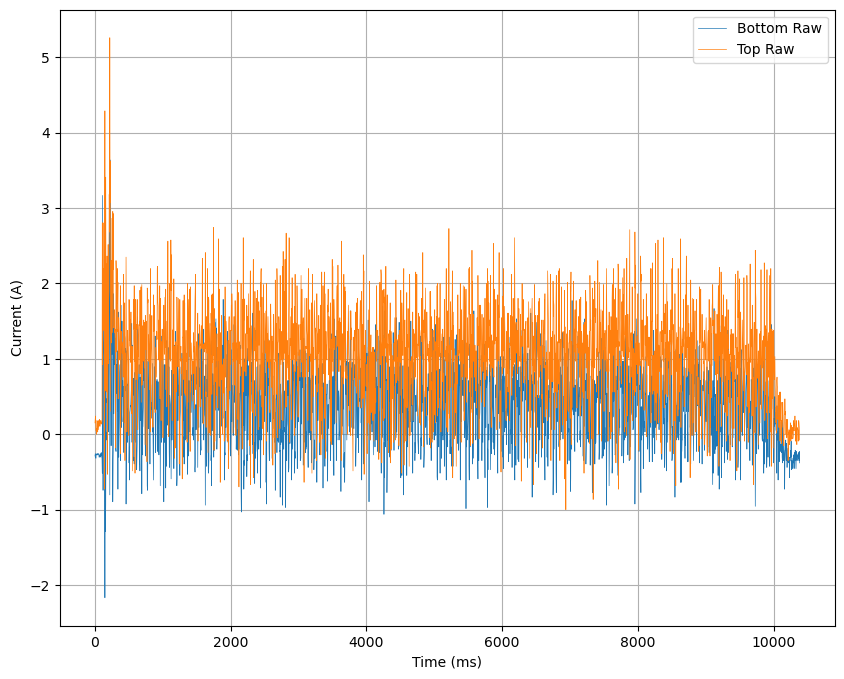

In [66]:
# 3. Plot data or get values as Numpy array.
# runner.plot("bottom_current_A")
plt.figure(figsize=(10, 8))

time_ms = runner.values("time_ms")
bottom_current = runner.values("bottom_current_A")
top_current = runner.values("top_current_A")
plt.plot(time_ms, bottom_current, label='Bottom Raw', linewidth=0.5)
plt.plot(time_ms, top_current, label='Top Raw', linewidth=0.5)

flt_current_bot = np.convolve(bottom_current, np.ones(20), 'same') / 20
flt_current_top = np.convolve(top_current, np.ones(20), 'same') / 20
# plt.plot(time_ms, flt_current_bot)
# plt.plot(time_ms, flt_current_top)
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()
plt.show()

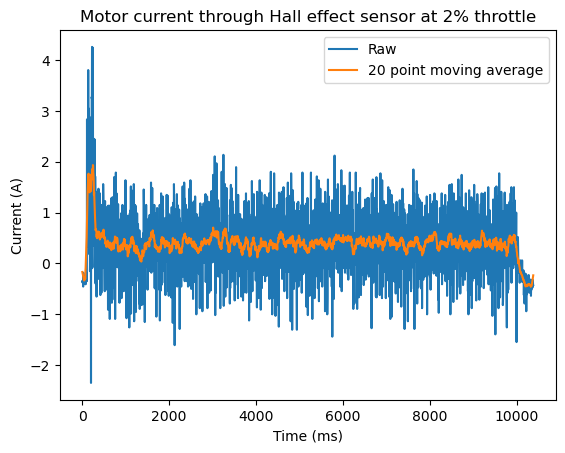

In [57]:
# 3. Plot data or get values as Numpy array.
# runner.plot("bottom_current_A")
time_ms = runner.values("time_ms")
bottom_current = runner.values("top_current_A")
plt.plot(time_ms, bottom_current, label='Raw')
flt_current = np.convolve(bottom_current, np.ones(20), 'same') / 20
plt.plot(time_ms, flt_current, label='20 point moving average')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.title('Motor current through Hall effect sensor at 2% throttle')
plt.legend()

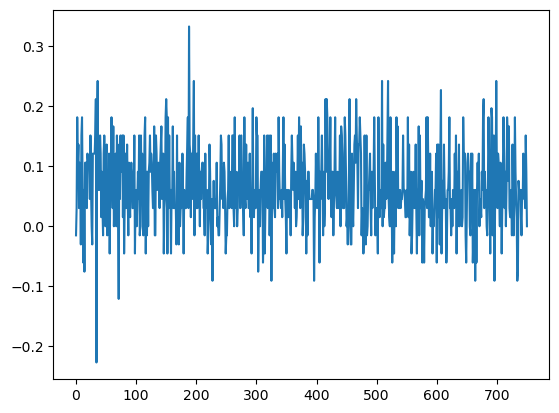

In [108]:
plt.plot(time_ms, runner.values("top_current_A"))
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.title('Motor current at 2% throttle')

In [92]:
np.mean(runner.values("top_current_A"))*66

-0.5579280559254327

In [93]:
np.mean(runner.values("bottom_current_A"))*66

-0.40746659920106526

In [58]:
# 4. Save or load from .csv.
runner.save("top_motor_4u7_cap_01_18.csv")